Image dimension: 240 rows x 360 columns
Direct method: 0.300141 s
Method filter2D : 0.0009018 s


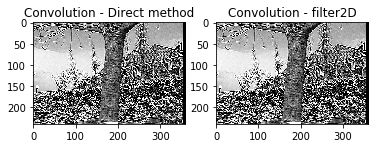

In [2]:
# Question 1
import numpy as np
import cv2

from matplotlib import pyplot as plt

#Read grayscale image and conversion to float64
img=np.float64(cv2.imread('./Image_Pairs/FlowerGarden2.png',0))
(h,w) = img.shape
print("Image dimension:",h,"rows x",w,"columns")

#Direct method
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Direct method:",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Direct method')

#Method filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Method filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')

plt.show()


Text(0.5, 1.0, 'Gradients from direct calculation')

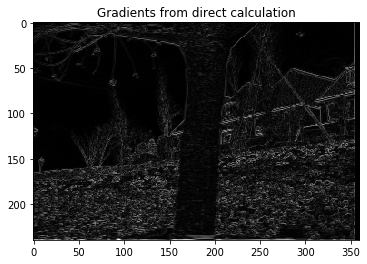

In [44]:
#Question 1.3

#Direct method gradient computation
gradient = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)

for x in range(0,h-1):
    for y in range(0,w-1):
        gradient_x = (img[x+1, y] - img[x, y])/2
        gradient_y = (img[x, y+1] - img[x, y])/2
        gradient[x,y] = np.sqrt(gradient_x**2 + gradient_y**2)

np.where(gradient < 0, 0, np.where(gradient > 255, 255, gradient))

plt.imshow(gradient, cmap = 'gray')
plt.title('Gradients from direct calculation')

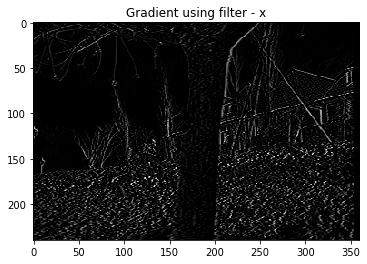

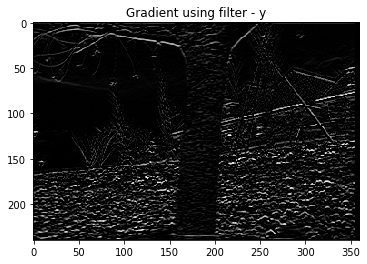

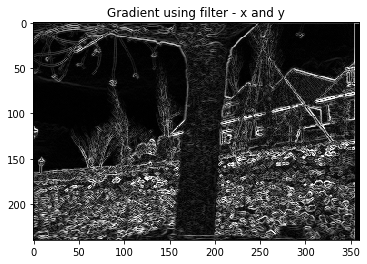

In [47]:
# Question 1.3

#Method filter2D
t1 = cv2.getTickCount()
#kernel_x = np.array([-1, 0, 1])
kernel_y = np.array([[-1], [0], [1]])
kernel_x = kernel_y.T
img3_x = cv2.filter2D(img,-1,kernel_x)
img3_y = cv2.filter2D(img,-1,kernel_y)

plt.imshow(img3_x,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Gradient using filter - x')

plt.show()

plt.imshow(img3_y,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Gradient using filter - y')

plt.show()

#plt.subplot(122)
#plt.imshow(img3_y,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#plt.title('Gradient using filter - y')

gradient_tot = np.sqrt(img3_x**2 + img3_y**2)
# for x in range(gradient_tot.shape[0]-1):
#     for y in range(gradient_tot.shape[1]-1):
#         gradient_tot[x,y] = 
#np.where(gradient_tot < 0, 0, np.where(gradient_tot > 255, 255, gradient_tot))
plt.imshow(gradient_tot,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Gradient using filter - x and y')

plt.show()


## File 2: Harris

Dimension of image: 320 rows x 400 columns
Type of image: float64
My computation of Harris points: 5.2882289 s
Number of cycles per pixel: 413.1428828125 cpp
Dimension of image: 320 rows x 400 columns x 3 channels
Type of image: uint8


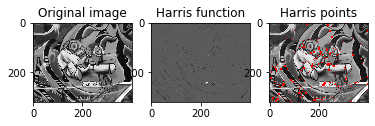

In [62]:
# Question 4

import numpy as np
import cv2

from matplotlib import pyplot as plt

#Reading grayscale image and conversion to float64
img=np.float64(cv2.imread('./Image_Pairs/Graffiti0.png',0))
(h,w) = img.shape
print("Dimension of image:",h,"rows x",w,"columns")
print("Type of image:",img.dtype)

#Beginning of calculus
t1 = cv2.getTickCount()
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)

# Calculation of interest map
# Calculating gradients
kernel_y = np.array([[-1], [0], [1]])
kernel_x = kernel_y.T
gradient_x = cv2.filter2D(img,-1,kernel_x)
gradient_y = cv2.filter2D(img,-1,kernel_y)

# Calculating compontents of autocorrelation matrix
I_xx = cv2.GaussianBlur(gradient_x**2, (3,3), 0)
I_xy = cv2.GaussianBlur(gradient_x * gradient_y, (3,3), 0)
I_yy = cv2.GaussianBlur(gradient_y**2, (3,3), 0)

for i in range(h):
    for j in range(w):
        auto_corr = [[I_xx[i, j], I_xy[i, j]], [I_xy[i, j], I_yy[i, j]]]
        Theta[i,j] = np.linalg.det(auto_corr) - 0.06*(np.trace(auto_corr)) * (np.trace(auto_corr))
                                                                                                  
Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)
#Suppression of non-local-maxima
Theta_maxloc[Theta < Theta_dil] = 0.0
#Values to small are also removed
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("My computation of Harris points:",time,"s")
print("Number of cycles per pixel:",(t2 - t1)/(h*w),"cpp")

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Original image')

plt.subplot(132)
plt.imshow(Theta,cmap = 'gray')
plt.title('Harris function')

se_croix = np.uint8([[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Re-read image for colour display
Img_pts=cv2.imread('./Image_Pairs/Graffiti0.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension of image:",h,"rows x",w,"columns x",c,"channels")
print("Type of image:",Img_pts.dtype)
#Points are displayed as red crosses
Img_pts[Theta_ml_dil > 0] = [255,0,0]
plt.subplot(133)
plt.imshow(Img_pts)
plt.title('Harris points')

plt.show()


## Question 6

In [68]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

import sys
print(len(sys.argv))
print(sys.argv)

if len(sys.argv) != 2:
    print ("Usage:",sys.argv[0],"detector(= orb or kaze)")
    sys.exit(2)
if sys.argv[1].lower() == "orb":
    detector = 1
elif sys.argv[1].lower() == "kaze":
    detector = 2
else:
    print ("Usage:",sys.argv[0],"detector(= orb or kaze)")
    sys.exit(2)

#Read the image pair
img1 = cv2.imread('../Image_Pairs/torb_small1.png')
print("Dimension of image 1:",img1.shape[0],"rows x",img1.shape[1],"columns")
print("Type of image 1:",img1.dtype)
img2 = cv2.imread('../Image_Pairs/torb_small2.png')
print("Dimension of image 2:",img2.shape[0],"rows x",img2.shape[1],"columns")
print("Type of image 2:",img2.dtype)

#Beggining the calculus...
t1 = cv2.getTickCount()
#Creation of objects "keypoints"
if detector == 1:
    kp1 = cv2.ORB_create(nfeatures = 250,#By default : 500
                         scaleFactor = 2,#By default : 1.2
                         nlevels = 3)#By default : 8
    kp2 = cv2.ORB_create(nfeatures=250,
                         scaleFactor = 2,
                         nlevels = 3)
    print("Detector: ORB")
else:
    kp1 = cv2.KAZE_create(upright = False,#By default : false
                        threshold = 0.001,#By default : 0.001
                        nOctaves = 4,#By default : 4
                        nOctaveLayers = 4,#By default : 4
                        diffusivity = 2)#By default : 2
    kp2 = cv2.KAZE_create(upright = False,#By default : false
                    threshold = 0.001,#By default : 0.001
                    nOctaves = 4,#By default : 4
                    nOctaveLayers = 4,#By default : 4
                    diffusivity = 2)#By default : 2
    print("Detector: KAZE")
#Conversion to grayscale
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Keypoints detection
pts1 = kp1.detect(gray1,None)
pts2 = kp2.detect(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Detection of key points:",time,"s")

#Displaying the keypoints
img1 = cv2.drawKeypoints(gray1, pts1, None, flags=4)
# flags defines the information level on key points
# 0: position only; 4: position + scale + direction
img2 = cv2.drawKeypoints(gray2, pts2, None, flags=4)

plt.subplot(121)
plt.imshow(img1)
plt.title('Image n°1')

plt.subplot(122)
plt.imshow(img2)
plt.title('Image n°2')

plt.show()

3
['C:\\Development\\Anaconda3.7\\envs\\OPT4Image\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Robin-PC\\AppData\\Roaming\\jupyter\\runtime\\kernel-06b22dc9-f391-48ee-afc9-c10ef58c87a7.json']
Usage: C:\Development\Anaconda3.7\envs\OPT4Image\lib\site-packages\ipykernel_launcher.py detector(= orb or kaze)


SystemExit: 2

In [69]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

import sys
if len(sys.argv) != 2:
  print ("Usage:",sys.argv[0],"detector(= orb or kaze)")
  sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage:",sys.argv[0],"detector(= orb or kaze)")
  sys.exit(2)

#Reading the image pair
img1 = cv2.imread('../Image_Pairs/torb_small1.png')
print("Dimension of image 1:",img1.shape[0],"rows x",img1.shape[1],"columns")
print("Type of image 1:",img1.dtype)
img2 = cv2.imread('../Image_Pairs/torb_small2.png')
print("Dimension of image 2:",img2.shape[0],"lignes x",img2.shape[1],"columns")
print("Type of image 2:",img2.dtype)

#Beginning the calculus
t1 = cv2.getTickCount()
#Creation of objects "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#By default : 500
                       scaleFactor = 1.2,#By default : 1.2
                       nlevels = 8)#By default : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Detector: ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#By default : false
    		        threshold = 0.001,#By default : 0.001
  		        nOctaves = 4,#By default : 4
		        nOctaveLayers = 4,#By default : 4
		        diffusivity = 2)#By default : 2
  kp2 = cv2.KAZE_create(upright = False,
	  	        threshold = 0.001,
		        nOctaves = 4,
		        nOctaveLayers = 4,
		        diffusivity = 2)
  print("Detector: KAZE")
#Conversion to gray scale
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Detection and description of keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
#Un-matched points will appear in grey 
img1 = cv2.drawKeypoints(gray1, pts1, None, color=(127,127,127), flags=0)
img2 = cv2.drawKeypoints(gray2, pts2, None, color=(127,127,127), flags=0)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Detection points and descriptors computation:",time,"s")
# Beginning of Matching
t1 = cv2.getTickCount()
if detector == 1:
  #Hamming distance for descriptor BRIEF (ORB)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
else:
  #L2 distance for descriptor M-SURF (KAZE)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1,desc2)
# Sorting the matches 
matches = sorted(matches, key = lambda x:x.distance)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Matching Computation:",time,"s")

# Display the N best matches
Nbest = 200
img3 = cv2.drawMatches(img1,pts1,img2,pts2,matches[:Nbest],None,flags=2)
plt.imshow(img3),plt.title('%i best matches'%Nbest)
plt.show()



Usage: C:\Development\Anaconda3.7\envs\OPT4Image\lib\site-packages\ipykernel_launcher.py detector(= orb or kaze)


SystemExit: 2